In [16]:
from osgeo import gdal

gdal_dataset = gdal.Open ("./SittardIR.tif")
#gdal_dataset2 = gdal.Open ("./LimburgExport2.tif")
#gdal_dataset3 = gdal.Open ("./LimburgExport3.tif")


In [17]:
import numpy


In [18]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook
R = gdal_dataset.GetRasterBand(1)
G = gdal_dataset.GetRasterBand(2)
B = gdal_dataset.GetRasterBand(3)

img_array1 = R.ReadAsArray()
img_array2 = G.ReadAsArray()
img_array3 = B.ReadAsArray()

img_array1=numpy.expand_dims(img_array1,axis=2)
img_array2=numpy.expand_dims(img_array2,axis=2)
img_array3=numpy.expand_dims(img_array3,axis=2)

stacked = numpy.append(img_array1,img_array2, axis=2)
stacked = numpy.append(stacked,img_array3,axis=2)

#plt.imshow ( stacked, interpolation='nearest', vmin=0)
#plt.show()

In [14]:
 print numpy.shape(stacked)

import cv2

x = numpy.shape(stacked)[0]
y = numpy.shape(stacked)[1]

#we want png figures of 300 by 300 pixels


increment = 300
print x/300
print y/300

(30000L, 30000L, 3L)
100
100


In [15]:
pictures = [];

name = 'sittard_rgb'


f = open('classes' +name+'.csv', 'a')
f.write("filename,solar_panels" + "\n")


params = list()
params.append(cv2.IMWRITE_PNG_COMPRESSION)
params.append(0)

# rather than appending you should simply save them
for i in range(increment,x+increment,increment):
    for j in range(increment,y+increment,increment):
            picture = stacked[i-increment:i,j-increment:j]
            cv2.imwrite('./figures_'+name +'/figure_'+name+ '_' + str(i) + "_" + str(j)+".png",picture,params)
            line = 'figure_'+ name+ '_' + str(i) + "_" + str(j)+".png" + "," + "0"
            f.write(line + "\n")
            
            
            '''if len(pictures) ==0:
                pictures = picture
                pictures = numpy.expand_dims(pictures,axis = 3)
            else:
                picture = numpy.expand_dims(picture,axis = 3)
                pictures = numpy.append(pictures,picture, axis=3)
            '''

f.close()

In [14]:
numpy.shape(picture)

(400L, 400L, 3L)

<IPython.core.display.Javascript object>


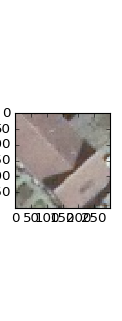

In [20]:
plt.imshow ( stacked[2000:2300,2000:2300])
plt.show()

In [ ]:
gdal_dataset.close()